# Интерполирование функций

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Рассматриваемая функция
def func(x):
    f_x = x*np.log(x+1)
    
    return f_x

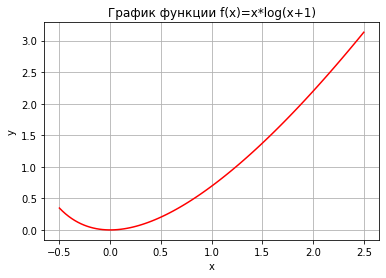

In [3]:
n = 3 #Степень полинома Лагранжа (n+1 - число точек интерполирования)
m = 100 #Количество точек разбиения для определения отклонения
n_k = [3, 5, 10, 15, 22, 35]

#Рассматриваемый интервал
a = -0.5
b = 2.5

#Построение графика функции
x=np.linspace(a, b, m)
plt.grid()
plt.plot(x, func(x), color='red')
plt.title('График функции f(x)=x*log(x+1)')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [4]:
#Нахождение равноотстоящих узлов
def x1():
    x1 = []
    table1 = pd.DataFrame(columns=('x', 'f(x)'))
    for i in range (0, n+1):
        x_i = a + i*(b-a)/n
        new_row1 = {'x': x_i, 'f(x)': func(x_i)}
        table1 = table1.append(new_row1, ignore_index = True) 
        x1.append(x_i)
        
    return x1

In [5]:
#Нахождение оптимальных узлов
def x2():
    x2 = []
    table2 = pd.DataFrame(columns=('x_opt', 'f(x)'))
    for i in range (0, n+1):
        x_i = 0.5 * ((b-a)*np.cos((2*i+1)*np.pi/(2*(n+1))) + (b+a))
        new_row2 = {'x_opt': x_i, 'f(x)': func(x_i)}
        table2 = table2.append(new_row2, ignore_index = True) 
        x2.append(x_i)
    x2.sort()
    return x2

# Интерполяционный полином Лагранжа

In [6]:
#Полином Лагранжа
def L_n(x, x_k):
    global n
    L_n = 0
    for i in range(0, n+1):
        P = 1
        for j in range(0, n+1):
            if j != i:
                P *= (x - x_k[j])/(x_k[i] - x_k[j])
        L_n += func(x_k[i])*P
        
    return L_n

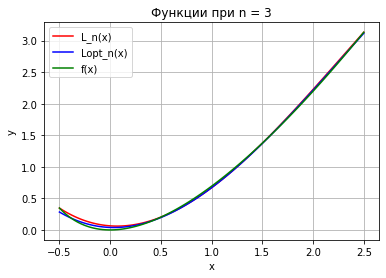

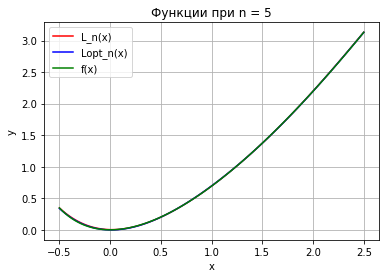

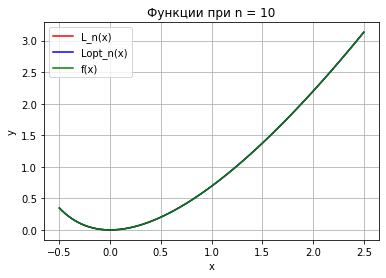

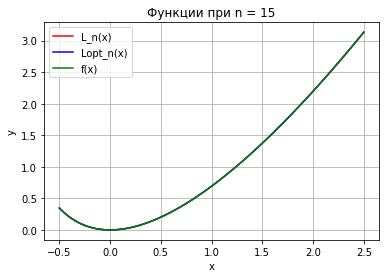

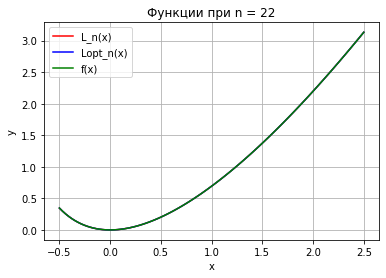

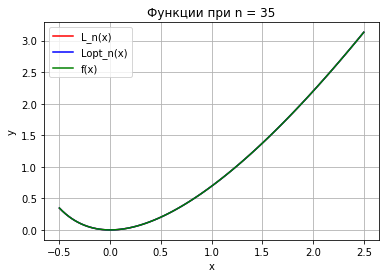

In [7]:
# Построение графиков при различных значениях n
x_t = np.linspace(a, b, m)

for n in n_k:
    plt.title('Функции при n = {}'.format(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x_t, L_n(x_t, x1()), '-', label = 'L_n(x)', color='red')
    plt.grid()
    plt.plot(x_t, L_n(x_t, x2()), '-', label = 'Lopt_n(x)', color='blue')
    plt.plot(x_t, func(x_t), '-', label = 'f(x)', color='green')
    plt.legend(loc='best')
    plt.show()


In [8]:
#Максимальное отклонение полинома Лагранжа
def RL_n(x_t, x_k):
    RL_n = 0
    for i in range(0, len(x_t)):
        if np.abs(func(x_t[i]) - L_n(x_t[i], x_k)) > RL_n:
            RL_n = np.abs(func(x_t[i]) - L_n(x_t[i], x_k))
        
    return RL_n

In [9]:
#Таблица результатов отклонений для различных значений n
table3 = pd.DataFrame(columns=('n', 'm', 'RL_n', 'RLopt_n'))

for i in range(0, len(n_k)):
    n = n_k[i]
    m = 50*n
    new_row3 = {'n': n, 'm': m, 'RL_n': RL_n(x_t, x1()), 'RLopt_n': RL_n(x_t, x2())}
    table3 = table3.append(new_row3, ignore_index = True) 

table3

,n,m,RL_n,RLopt_n
0,3.0,150.0,7.726152e-02,6.285300e-02
1,5.0,250.0,1.365727e-02,8.030152e-03
2,10.0,500.0,4.185912e-04,7.869211e-05
3,15.0,750.0,1.971756e-05,1.001754e-06
4,22.0,1100.0,3.831066e-07,2.643428e-09
5,35.0,1750.0,7.493309e-09,5.390133e-14


# Интерполяционный полином Ньютона

In [10]:
#Вектор значений рассматриваемой функции
def func_k(x_k):
    func_k = []
    for i in range(0, len(x_k)):
        func_k.append(func(x_k[i]))
        
    return func_k

In [11]:
#Нахождение w из формулы
def w(x, x_k):
    w = [1]
    for i in range(0, len(x_k)):
        w.append(w[i]*(x-x_k[i]))    
    return w

In [12]:
#Нахождение разделенных разностей
def div_diff(x_k, f_k):
    div_diff = [f_k[0]]
    
    temp1 = f_k
    temp2 = []
    
    for i in range(1, len(f_k)):
        for j in range(0, len(f_k)-i):
            f = (temp1[j+1]-temp1[j])/(x_k[j+i]-x_k[j])

            temp2.append(f)            
         
        div_diff.append(temp2[0])
        temp1 = temp2.copy()
        temp2.clear()
            
    
    return div_diff

In [13]:
#Нахождение интерполяционного полинома Ньютона
def P_n(x, x_k, f_k):
    omega = w(x, x_k)
    divided_diff = div_diff(x_k, f_k)
    P_n = 0
    for i in range(0, n+1):
            P_n += divided_diff[i]*omega[i]
    return P_n

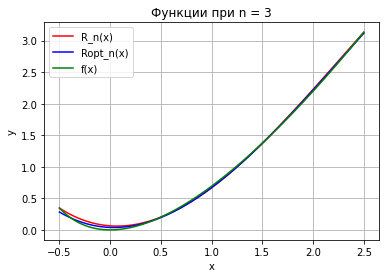

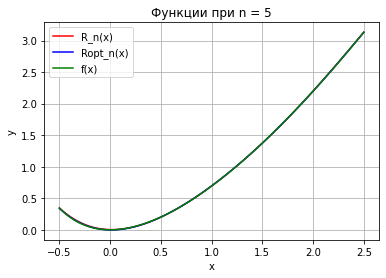

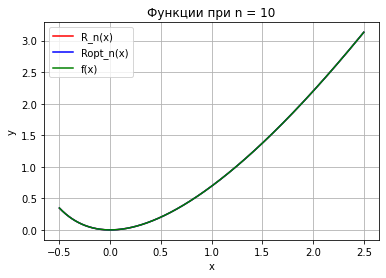

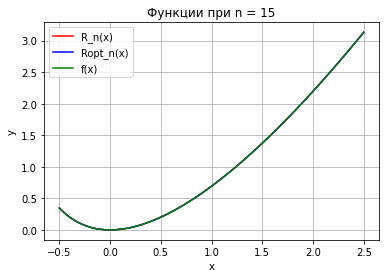

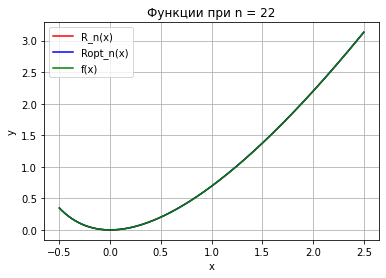

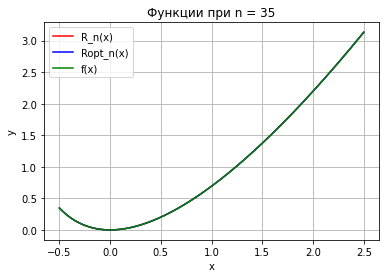

In [14]:
#Построение графика функций
x_t = np.linspace(a, b, m)

for n in n_k:
    plt.title('Функции при n = {}'.format(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x_t, P_n(x_t, x1(), func_k(x1())), '-', label = 'R_n(x)', color='red')
    plt.grid()
    plt.plot(x_t, P_n(x_t, x2(), func_k(x2())), '-', label = 'Ropt_n(x)', color='blue')
    plt.plot(x_t, func(x_t), '-', label = 'f(x)', color='green')
    plt.legend(loc='best')
    plt.show()

In [15]:
#Максимальное отклонение полинома Ньютона
def RN_n(x_t, x_k, f_k):
    RN_n = 0
    for i in range(0, len(x_t)):
        if np.abs(func(x_t[i]) - P_n(x_t[i], x_k, f_k)) > RN_n:
            RN_n = np.abs(func(x_t[i]) - P_n(x_t[i], x_k, f_k))
        
    return RN_n

In [16]:
#Таблица результатов отклонений для различных значений n
table4 = pd.DataFrame(columns=('n', 'm', 'RN_n', 'RNopt_n'))

#Сохраняем в списки полученные отклонения для разных n
RN = []
RNopt = []

for n in n_k:
    m = 20*n
    F1 = RN_n(x_t, x1(), func_k(x1()))
    F2 = RN_n(x_t, x2(), func_k(x2()))
    RN.append(F1)
    RNopt.append(F2)
    
    new_row4 = {'n': n, 'm': m, 'RN_n': F1, 'RNopt_n': F2}
    table4 = table4.append(new_row4, ignore_index = True) 

table4

,n,m,RN_n,RNopt_n
0,3.0,60.0,7.728044e-02,6.285300e-02
1,5.0,100.0,1.368316e-02,8.030152e-03
2,10.0,200.0,4.250398e-04,7.869211e-05
3,15.0,300.0,2.032024e-05,1.001754e-06
4,22.0,440.0,3.832754e-07,2.643428e-09
5,35.0,700.0,4.245978e-09,2.976566e-10


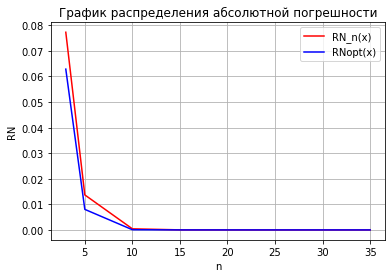

In [17]:
#Построение зависимости максимального отклонения от n
plt.title('График распределения абсолютной погрешности')
plt.ylabel('RN')
plt.xlabel('n')
plt.plot(n_k, RN, '-', label = 'RN_n(x)', color='red')
plt.plot(n_k, RNopt, '-', label = 'RNopt(x)', color='blue')
plt.grid()    
plt.legend(loc='best')
plt.show()

# Интерполяция сплайнами

In [18]:
#Реализуем метод Гаусса
def gaussian_elimin(A, b):   
    x_k = []
    a_k = []
   
    for k in range(len(A)):
        A[k].append(b[k])

#--------------------------------------------------------------------------
    #Прямой ход метода Гаусса
    for t in range(len(A)-1):
        num_null = 0
        for i in range(len(A)-t-1):          
            if (A[t][t] == 0) and (A[t+1+i][t] != 0):
                temp = A[t+1+i].copy()
                A[t+1+i] = A[t].copy()
                A[t] = temp
                num_null+=1
                
                if (num_null == len(A)-1-t):
                    break
                    
                continue
            
            elif (A[t][t] == 0) and (A[t+1+i][t] == 0):
                num_null+=1
                    
                if (num_null == len(A)-1-t):
                    print("Ошибка! Определитель равен нулю!")
                    break
                      
                continue
               
            a_k = A[t+1+i][t]
            for j in range(len(A[0])-t):
                A[i+1+t][t+j] -= A[t][t+j]*(a_k/A[t][t]) 
#--------------------------------------------------------------------------
                
    #Обратный ход метода Гаусса
    temp = 0
    for i in range(len(A)):
        x_i = (A[len(A)-1-i][len(A)]-temp)/A[len(A)-1-i][len(A)-1-i] 
        x_k.insert(0, x_i)
        
        temp = 0
        for j in range(len(x_k)):
            temp += x_k[len(x_k)-1-j] * A[len(A)-i-2][len(A)-j-1] 
                                        
    return x_k                   

# Сплайн S_10

In [19]:
#Построение сплайна S_10
def S_10(x, x_k, y_k, case):
    A = []
    y = []

#-----------Заполнение матрицы--------------
    for i in range(2*(len(x_k)-2)+2):
        A.append([])
        for j in range(2*(len(x_k)-2)+2):
            A[i].append(0)    
            
    for i in range(n):
            A[2*i][2*i] = x_k[i]
            A[2*i][2*i+1] = 1
            A[2*i+1][2*i] = x_k[i+1]
            A[2*i+1][2*i+1] = 1
            
            #Заполнение вектора правой части
            y.append(y_k[i])
            y.append(y_k[i+1])
            
    
    a_k = gaussian_elimin(A, y)
        
    return find_lk(x, x_k, y_k, a_k, case)

In [20]:
#Функция, позволяющая определить необходимый участок сплайна и значение точки на нём
def find_lk(x, x_k, y_k, a_k, case):
    l_k = []
    if case == 1: #равноотстоящие узлы для S_10  
        for i in range(n):
            for x_i in x:
                if x_i >= x_k[i] and x_i < x_k[i+1]:
                    l_k.append(a_k[2*i]*x_i + a_k[2*i+1])
        
        #Добавление последней точки интервала
        if x[-1] == x_k[-1]:
            l_k.append(a_k[-2]*x[-1] + a_k[-1])
      

    if case == 2: #Оптимальные узлы для S_10
        
        #Точки, расположенные левее первого оптимального узла
        for x_i in x:
            if x_i <= x_k[0]:
                l_k.append(a_k[0]*x_i + a_k[1])
            else:
                break
                
        #Точки, расположенные между узлами интерполирования 
        for i in range(n):
            for x_i in x:
                if x_i > x_k[i] and x_i <= x_k[i+1]:
                    l_k.append(a_k[2*i]*x_i + a_k[2*i+1])           
                if x_i > x_k[-1]:
                    break
        
        
        #Точки, расположенные правее последнего оптимального узла                    
        for x_i in x:
            if x_i > x_k[-1]:
                l_k.append(a_k[-2]*x_i + a_k[-1])    
                
     
    if case == 3: #равноотстоящие узлы для S_21 
        for i in range(n):
            for x_i in x:
                if x_i >= x_k[i] and x_i < x_k[i+1]:
                    l_k.append(a_k[3*i]*x_i**2 + a_k[3*i+1]*x_i + a_k[3*i+2])

        if x[-1] == x_k[-1]:
            l_k.append(a_k[-3]*x[-1]**2 + a_k[-2]*x[-1] + a_k[-1])
      

    
    if case == 4: #Оптимальные узлы для S_21
        for x_i in x:
            if x_i <= x_k[0]:
                l_k.append(a_k[0]*x_i**2 + a_k[1]*x_i + a_k[2])
            else:
                break

        for i in range(n):
            for x_i in x:
                if x_i > x_k[i] and x_i <= x_k[i+1]:
                    l_k.append(a_k[3*i]*x_i**2 + a_k[3*i+1]*x_i + a_k[3*i+2])           
                if x_i > x_k[-1]:
                    break
                    
        for x_i in x:
            if x_i > x_k[-1]:
                l_k.append(a_k[-3]*x_i**2 + a_k[-2]*x_i + a_k[-1])    
                             
    return l_k    

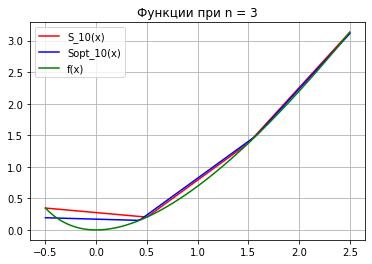

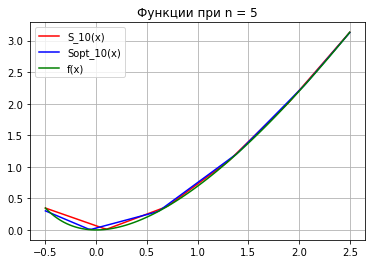

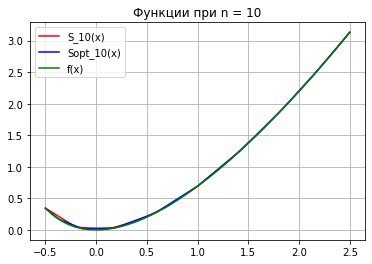

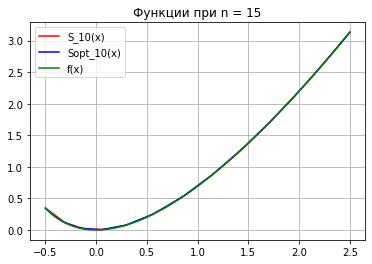

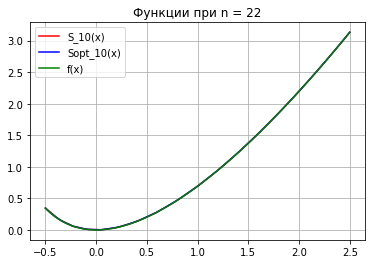

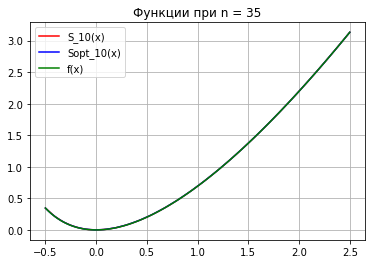

In [21]:
# Построение графиков
m = 100
x_t = np.linspace(a, b, m)

for n in n_k:
    plt.title('Функции при n = {}'.format(n))
    plt.plot(x_t, S_10(x_t, x1(), func_k(x1()), 1), '-', label = 'S_10(x)', color='red')
    plt.plot(x_t, S_10(x_t, x2(), func_k(x2()), 2), '-', label = 'Sopt_10(x)', color='blue')
    plt.plot(x_t, func_k(x_t), '-', label = 'f(x)', color='green')

    plt.grid()    
    plt.legend(loc='best')
    plt.show()

In [22]:
#Максимальное отклонение сплайна S_10
def RS_10(x_t, x_k, f_k, case):
    RS_10 = 0
    l_k = S_10(x_t, x_k, f_k, case)
    
    for i in range(0, len(x_t)):
        if np.abs(func(x_t[i]) - l_k[i]) > RS_10:
            RS_10 = np.abs(func(x_t[i]) - l_k[i])
        
    return RS_10

In [23]:
#Таблица результатов отклонений для различных значений n
table5 = pd.DataFrame(columns=('n', 'm', 'RS10_n', 'RS10opt_n'))
 
for n in n_k:
    m = 50*n
    new_row5 = {'n': n, 'm': m, 'RS10_n': RS_10(x_t, x1(), func_k(x1()), 1), 'RS10opt_n': RS_10(x_t, x2(), func_k(x2()), 2)}
    table5 = table5.append(new_row5, ignore_index = True) 

table5

,n,m,RS10_n,RS10opt_n
0,3.0,150.0,0.279582,0.170987
1,5.0,250.0,0.134775,0.081168
2,10.0,500.0,0.044766,0.025193
3,15.0,750.0,0.022458,0.011884
4,22.0,1100.0,0.011296,0.005792
5,35.0,1750.0,0.004463,0.002356


# Сплайн S_21

In [24]:
#Построение сплайна S_21
def S_21(x, x_k, y_k, case):
    A = []
    yy = []
    l_k = []
    dim = 3*n
    for i in range(dim):
        A.append([])
        for j in range(dim):
            A[i].append(0)

    #Заполнение строк с основными условиями интерполяции
    for i in range(n):
            A[3*i][3*i] = x_k[i]**2
            A[3*i][3*i+1] = x_k[i]
            A[3*i][3*i+2] = 1               
                    
            A[3*i+1][3*i] = x_k[i+1]**2
            A[3*i+1][3*i+1] = x_k[i+1]
            A[3*i+1][3*i+2] = 1

    #Заполнение строк с производными   
    for i in range(n-1):
        for j in range(2):
            A[3*i+2][3*j+3*i] = (-1)**j * 2*x_k[i+1]
            A[3*i+2][3*j+3*i+1] = (-1)**j 
            A[3*i+2][3*j+3*i+2] = 0
                        
    #Заполнение последней строки матрицы
    A[-1][-1] = 0
    A[-1][-2] = 1
    A[-1][-3] = 2*x_k[-1]

    for i in range(n):
        yy.append(y_k[i])
        yy.append(y_k[i+1])
        yy.append(0)
    
    #Метод гаусса
    a_k = gaussian_elimin(A, yy)
            
    return find_lk(x, x_k, y_k, a_k, case)

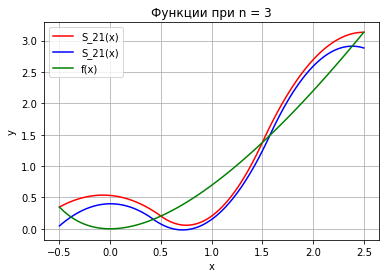

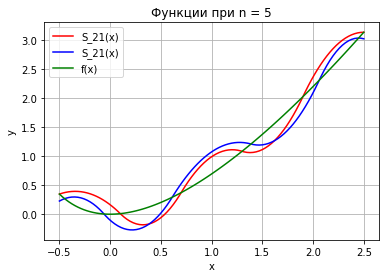

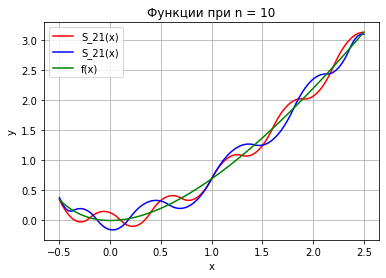

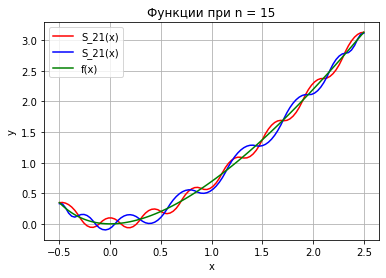

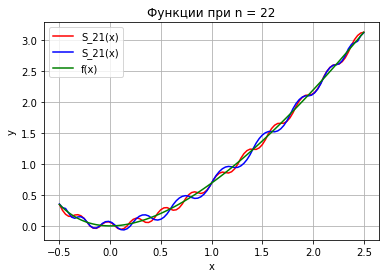

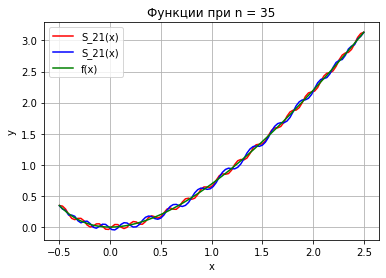

In [25]:
# Построение графиков
m = 100
x_t = np.linspace(a, b, m)

for n in n_k:
    plt.title('Функции при n = {}'.format(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x_t, S_21(x_t, x1(), func_k(x1()), 3), '-', label = 'S_21(x)', color='red')
    plt.plot(x_t, S_21(x_t, x2(), func_k(x2()), 4), '-', label = 'S_21(x)', color='blue')
    plt.plot(x_t, func_k(x_t), '-', label = 'f(x)', color='green')

    plt.grid()    
    plt.legend(loc='best')
    plt.show()


In [26]:
#Максимальное отклонение сплайна S_21
def RS_21(x_t, x_k, f_k, case):
    RS_21 = 0
    l_k = S_21(x_t, x_k, f_k, case)
    
    for i in range(0, len(x_t)):
        if np.abs(func(x_t[i]) - l_k[i]) > RS_21:
            RS_21 = np.abs(func(x_t[i]) - l_k[i])
        
    return RS_21

In [27]:
#Таблица результатов отклонений для различных значений n
table6 = pd.DataFrame(columns=('n', 'm', 'RS21_n', 'RS21opt_n'))
 
for i in n_k:
    n = i
    m = 50*n    
    new_row6 = {'n': i, 'm': m, 'RS21_n': RS_21(x_t, x1(), func_k(x1()), 3), 'RS21opt_n': RS_21(x_t, x2(), func_k(x2()), 4)}
    table6 = table6.append(new_row6, ignore_index = True) 

table6

,n,m,RS21_n,RS21opt_n
0,3.0,150.0,0.533877,0.544443
1,5.0,250.0,0.308180,0.379483
2,10.0,500.0,0.147951,0.206444
3,15.0,750.0,0.098349,0.142865
4,22.0,1100.0,0.066269,0.100232
5,35.0,1750.0,0.042149,0.063594


# Сплайн S_32

In [28]:
#Построение сплайна S_32
def S_32(x, x_k, y_k, case):
    p = n+1 #количество точек 
    H = [] #Матрица H из формулы
    h_k = [] #Вектор из h_i
    g_k = [] #Вектор гамма из формулы Hy=g
    y1 = [] #Вектор y'
    l_k = [] #Вектор значений сплайна в различных точках
  


    for i in range(p-1):
        h_k.append(x_k[i+1]-x_k[i])

#------Заполнение матрицы H----------
    for i in range(p-2):
        H.append([])
        for j in range(p-2):
            H[i].append(0)
            
    for i in range(p-2):
        H[i][i] = 2*(h_k[i]+h_k[i+1])      
            
    for i in range(p-3):
        H[i][i+1] = h_k[i+1]
        H[i+1][i] = h_k[i+1]
#-------------------------------------        
        
    #Находим вектор гамма
    for i in range(1, p-1):
        g_k.append(6*(y_k[i+1]-y_k[i])/h_k[i] - (y_k[i]-y_k[i-1])/h_k[i-1])
         
    #Находим вектор y11 из системы H*y11=g_k
    y11 = gaussian_elimin(H, g_k)
    y11.insert(0, 0)
    y11.append(0)
    
    #Находим вектор y'
    for i in range(p-1):
        y1.append((y_k[i+1]-y_k[i])/h_k[i] - y11[i+1]*h_k[i]/6 - y11[i]*h_k[i]/3)    

        
#Выбираем участок сплайна, соответсвующий определенной точке 
    if case == 5: #равноотстоящие узлы для S_32 
        for i in range(n):
            for x_i in x:
                if x_i >= x_k[i] and x_i < x_k[i+1]:
                    l_k.append(y_k[i] + y1[i]*(x_i-x_k[i]) + y11[i]*(x_i-x_k[i])**2/2 + (y11[i+1]-y11[i])*(x_i-x_k[i])**3/(6*h_k[i]))

        if x[-1] == x_k[-1]:
            l_k.append(y_k[-1] + y1[-1]*(x[-1]-x_k[-1]) + y11[-2]*(x[-1]-x_k[-1])**2/2 + (y11[-1]-y11[-2])*(x[-1]-x_k[-1])**3/(6*h_k[-1]))
      
    if case == 6: #Оптимальные узлы для S_32
        for x_i in x:
            if x_i <= x_k[0]:
                l_k.append(y_k[0] + y1[0]*(x_i-x_k[0]) + y11[0]*(x_i-x_k[0])**2/2 + (y11[1]-y11[0])*(x_i-x_k[0])**3/(6*h_k[0]))
            else:
                break

        for i in range(n):
            for x_i in x:
                if x_i > x_k[i] and x_i <= x_k[i+1]:
                    l_k.append(y_k[i] + y1[i]*(x_i-x_k[i]) + y11[i]*(x_i-x_k[i])**2/2 + (y11[i+1]-y11[i])*(x_i-x_k[i])**3/(6*h_k[i]))           
                if x_i > x_k[-1]:
                    break
                    
        for x_i in x:
            if x_i > x_k[-1]:
                l_k.append(y_k[-1] + y1[-1]*(x_i-x_k[-1]) + y11[-2]*(x_i-x_k[-1])**2/2 + (y11[-1]-y11[-2])*(x_i-x_k[-1])**3/(6*h_k[-1]))    
    

    return l_k

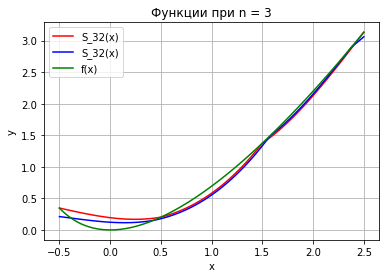

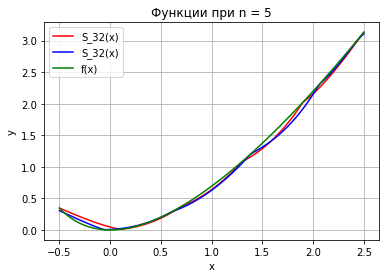

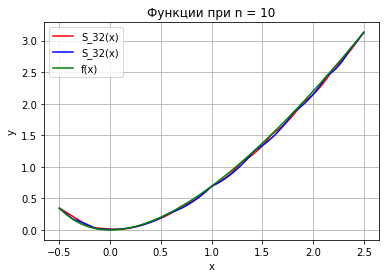

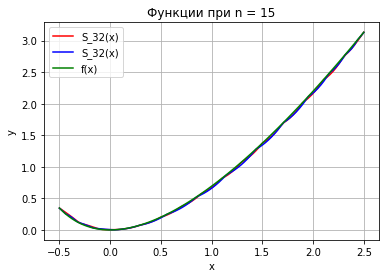

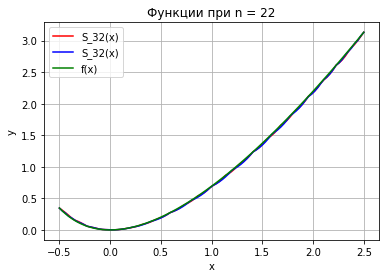

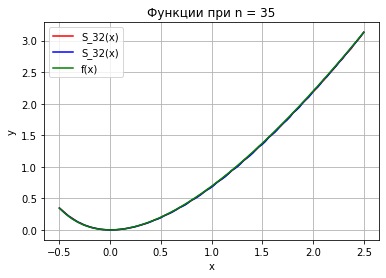

In [29]:
# Построение графиков
m = 100
x_t = np.linspace(a, b, m)
for n in n_k:
    plt.title('Функции при n = {}'.format(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x_t, S_32(x_t, x1(), func_k(x1()), 5), '-', label = 'S_32(x)', color='red')
    plt.plot(x_t, S_32(x_t, x2(), func_k(x2()), 6), '-', label = 'S_32(x)', color='blue')
    plt.plot(x_t, func_k(x_t), '-', label = 'f(x)', color='green')

    plt.grid()    
    plt.legend(loc='best')
    plt.show()

In [30]:
#Максимальное отклонение сплайна S_32
def RS_32(x_t, x_k, f_k, case):
    n = n_k
    RS_32 = 0
    l_k = S_32(x_t, x_k, f_k, case)
    
    for i in range(0, len(x_t)):
        if np.abs(func(x_t[i]) - l_k[i]) > RS_32:
            RS_32 = np.abs(func(x_t[i]) - l_k[i])
        
    return RS_32

In [31]:
#Таблица результатов отклонений для различных значений n
table7 = pd.DataFrame(columns=('n', 'm', 'RS32_n', 'RS32opt_n'))
 
for i in n_k:
    n = i
    m = 50*n
    new_row7 = {'n': i, 'm': m, 'RS32_n': RS_32(x_t, x1(), func_k(x1()), 5), 'RS32opt_n': RS_32(x_t, x2(), func_k(x2()), 6)}
    table7 = table7.append(new_row7, ignore_index = True) 

table7

,n,m,RS32_n,RS32opt_n
0,3.0,150.0,0.206564,0.142258
1,5.0,250.0,0.107828,0.131224
2,10.0,500.0,0.059828,0.061543
3,15.0,750.0,0.041689,0.041752
4,22.0,1100.0,0.028683,0.029576
5,35.0,1750.0,0.018349,0.018817


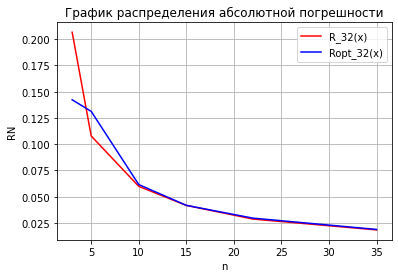

In [32]:
# Построение графиков
m = 100
x_t = np.linspace(a, b, m)
RSn_32 = []
RSopt_32 = []
   
for i in n_k:
    n = i
    RSn_32.append(RS_32(x_t, x1(), func_k(x1()), 5))
    RSopt_32.append(RS_32(x_t, x2(), func_k(x2()), 6))
        

plt.title('График распределения абсолютной погрешности')
plt.ylabel('RN')
plt.xlabel('n')
plt.plot(n_k, RSn_32, '-', label = 'R_32(x)', color='red')
plt.plot(n_k, RSopt_32, '-', label = 'Ropt_32(x)', color='blue')
plt.grid()    
plt.legend(loc='best')
plt.show()